In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import matplotlib.pyplot as plt
import mplfinance as mplf
import numpy as np
import pandas as pd

import bars
import c
import labels
import signals
import u

# Fractional Differentation

<AxesSubplot:>

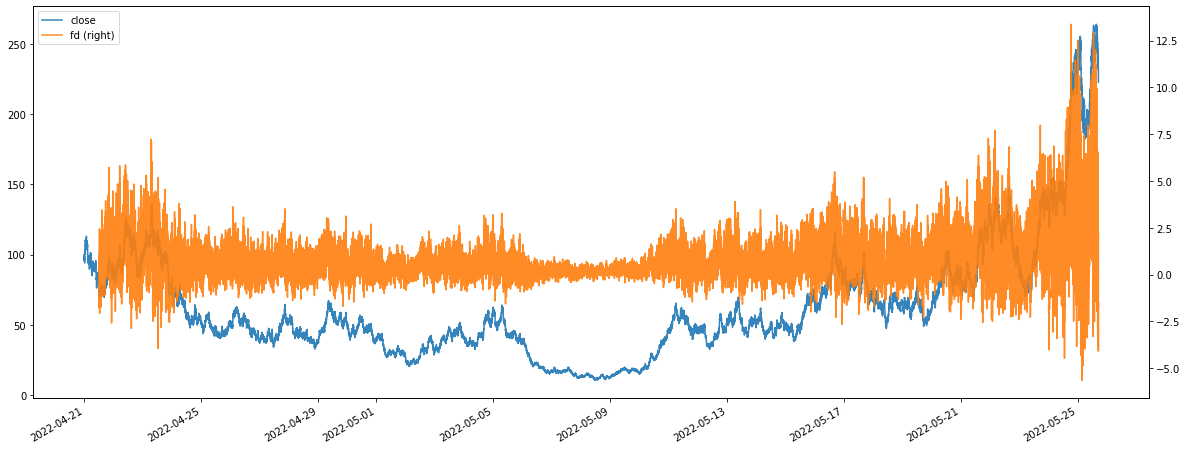

In [21]:
plt.rcParams["figure.figsize"] = (20, 5)

data = u.create_price_data(theta=0.0001, start_price=100, n_samples=50000)
data["fd"] = signals.get_fixed_window_fractional_differentiated_series(
    data["close"], 0.55, threshold=1e-5
)
data[["close", "fd"]].plot(secondary_y="fd", figsize=(20, 8), alpha=0.9)

In [23]:
data["fd"].corr(data["close"])

0.5913622601807091

In [32]:
import statsmodels.stats.stattools as st

s, p, _, _ = st.jarque_bera(data["fd"].dropna())
f"Test Statistic: {s:.2f}, p-value {p}"

'Test Statistic: 207352.52, p-value 0.0'

<AxesSubplot:>

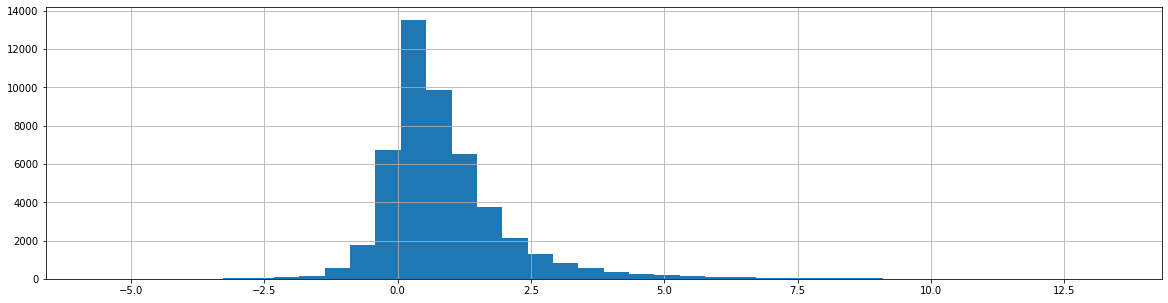

In [31]:
data["fd"].hist(bins=40)